# Assignment 03


In this assignment we will use the `diabetes` dataset, which was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. 

We will use logistic regression to predict whether subjects have diabetes or not.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
seed=0

## Question 1.1 [ _ /3 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. 

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /6 marks]

(1) How many classes are there? How many features are available to predict the outcome?

**Your answer**: There are 2 classes (being 1 or 0 in the outcome) and the number of available features is 8 ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age').

(2) Is the dataset class-balanced?

In [3]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Your answer**: No the dataset is not balanced, it is in favor of the 0 outcome over the 1 outcome.  This means that in this dataset there is more outcomes without diabetes than with diabetes.

(3) For this classification problem, what is the baseline accuracy? Round into 3 decimal place.

In [4]:
baseline_accuracy = 500 / (500 + 268)
print("Baseline Accuracy is:", round((baseline_accuracy * 100), 3))

Baseline Accuracy is: 65.104


## Question 1.3 [ _ /3 marks]

Use `train_test_split` with `random_state=0` to split the data into training and test sets. Leave `20%` for testing.

In [5]:
# Store all the features into variable "X"
X = np.c_[df['Pregnancies'], df['Glucose'], df['BloodPressure'], df['SkinThickness'], df['Insulin'], df['BMI'], df['DiabetesPedigreeFunction'], df['Age']]

# Store the output class values into variable "y" 
y = df['Outcome']

# Split your X and y data using train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Question 2.1 [ _ /3 marks]

We will use sklearn's `LogisticRegression` to solve the classification problem. Before we move on, answer the following questions by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


(1) Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**Your answer**: Yes, LogisticRegression() uses a penalty by default and it is the l2 penalty


    
(2) If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**Your answer**:


    
(3) If using the default settings of `LogisticRegression`, do you need to include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**Your answer**: No you do not need to include a column of 1s in your feature/design matrix when using the default settings of LogisticRegression due to the fit_intercept default setting being True.  This parameter being True essentially adds the column of ones for us so that the intercept can be obtained for the regression.

## Question 2.2 [ _ /10 marks]

Create a `LogisticRegression` model with `penalty=none`. Let's fisrt train and test this classifier using only "Insulin" as the input feature. Make a scatter plot of the points. Plot your prediction on the same graph.

<AxesSubplot:>

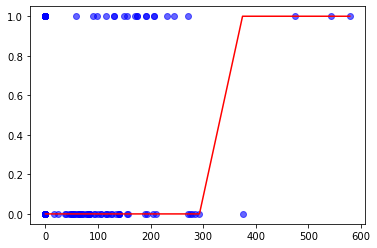

In [6]:
# Create a LogisticRegression model without regularization 
logReg = LogisticRegression(penalty = 'none', max_iter = 10000)


# Obtain training data and test data  
X2 = np.c_[df['Insulin']]
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y, test_size = 0.2, random_state = 0)

# Fit to your training data using Logistic Regression 
logReg.fit(xtrain2, ytrain2)


# Create a scatter plot of the test data. 
plt.scatter(xtest2, ytest2, c = 'blue', alpha = 0.6)

# Also plot your prediction using sns.lineplot
# lineplot needs 1d vector x
ypred = logReg.predict(xtest2)
ypred_prob = logReg.predict_proba(xtest2)

sns.lineplot(x = xtest2.flatten(), y = ypred, color = 'red')

## Question 2.3 [ _ /10 marks]
Evaluate the classification performance using `Accuracy`, `Recall`, `Precision`, `Sensitivity` and `Specificity`.

In [7]:
def evalClassification(ypred, y, labels):
    tPos = sum(np.logical_and(ypred == labels[1], y == labels[1]))
    tNeg = sum(np.logical_and(ypred == labels[0], y == labels[0]))
    fPos = sum(np.logical_and(ypred == labels[1], y == labels[0]))
    fNeg = sum(np.logical_and(ypred == labels[0], y == labels[1]))
    
    accuracy = (tPos + tNeg) / (tPos + tNeg + fPos + fNeg)
    print(f'Accuracy: {round(accuracy, 3)}')
    recall = (tPos) / (tPos + fNeg)
    print(f'Recall: {round(recall, 3)}')
    precision = (tPos) / (tPos + fPos)
    print(f'Precision: {round(precision, 3)}')
    print(f'Sensitivity: {round(recall, 3)}')
    spec = (tNeg) / (tNeg + fPos)
    print(f'Specificity: {round(spec, 3)}')

## Question 3.1 [ _ /10 marks]

Create another `LogisticRegression` model with `penalty=none`. Train and test this classifier with all features and then evaluate the performance.

In [8]:
# Create a LogisticRegression model without regularization 
logReg2 = LogisticRegression(penalty = 'none', max_iter = 10000)


# Fit to your training data using Logistic Regression 
logReg2.fit(xtrain, ytrain)


# Compute your test predictions, given test inputs 
ypred2 = logReg2.predict(xtest)
ypred2_prob = logReg2.predict_proba(xtest)

# Evaluate the performance
print(f'All features: ')
evalClassification(ypred2, ytest, logReg2.classes_)

print('One feature: ')
evalClassification(ypred, ytest2, logReg.classes_)


All features: 
Accuracy: 0.825
Recall: 0.617
Precision: 0.763
Sensitivity: 0.617
Specificity: 0.916
One feature: 
Accuracy: 0.708
Recall: 0.064
Precision: 0.75
Sensitivity: 0.064
Specificity: 0.991


Does using more features help to improve the classification?

**Your answer** : Yes using more features helps to improve the classification.  As we can see from the various performance evaluations performed on the two regressions, both accuracy and precision rose with sensitivity and recall staying at a reasonably low value.

## Question 3.2 [ _ /10 marks]
Let's adjust the decision threshold from 0.5 (default) to 0.4 and 0.6, and then evlaute the performance.

In [9]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
threshold = 0.4
ypred2_prob = logReg2.predict_proba(xtest)
thresh_ypred2 = logReg2.classes_[(ypred2_prob[:, 1] > threshold).astype(int)]

# Evaluate the performance
evalClassification(thresh_ypred2, ytest, logReg2.classes_)

Accuracy: 0.792
Recall: 0.723
Precision: 0.642
Sensitivity: 0.723
Specificity: 0.822


In [10]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.6
ypred2_prob = logReg2.predict_proba(xtest)
thresh_ypred2 = logReg2.classes_[(ypred2_prob[:, 1] > threshold).astype(int)]

# Evaluate the performance
evalClassification(thresh_ypred2, ytest, logReg2.classes_)

Accuracy: 0.818
Recall: 0.553
Precision: 0.788
Sensitivity: 0.553
Specificity: 0.935


What do you think is a better threshold? 

**Your answer**: I think the better threshold in this case would be the 0.6 threshold since it has a much better perceived ratio of Precision to recall.  The 0.4 threshold simply has too low of a Precision for me to consider it a better option

## Question 3.3 [ _ /10 marks]

Create a final `LogisticRegression` model with `penalty=l2`, `C=0.01`. Train and test this classifier with all features and then evaluate the performance.

In [11]:
# Create a LogisticRegression model with l2 regularization 
logReg3 = LogisticRegression(penalty = 'l2', max_iter = 10000, C = 0.01)


# Fit to your training data using Logistic Regression 
logReg3.fit(xtrain, ytrain)


# Compute your test predictions, given test inputs 
ypred3 = logReg3.predict(xtest)
ypred3_prob = logReg3.predict_proba(xtest)

# Evaluate the performance
evalClassification(ypred3, ytest, logReg3.classes_)

Accuracy: 0.812
Recall: 0.596
Precision: 0.737
Sensitivity: 0.596
Specificity: 0.907


Does regularization help to improve the classification?

**Your answer** : In comparison to the second model, this regularization did not really improve the model.  Therefore no, the regularization did not improve the classification in this instance.

## Question 4 [ _ /15 marks]

Plot ROC Curves for the classifiers you used in questions 2.2, 3.1, and 3.3. Use AUC to determine which classifier is the best.

0.536
0.867
0.853


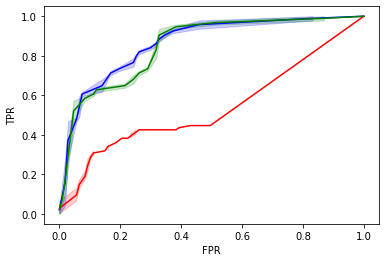

In [12]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers 
FPR, TPR, _ = roc_curve(ytest, ypred_prob[:, 1], pos_label = logReg.classes_[1])
FPR2, TPR2, _ = roc_curve(ytest, ypred2_prob[:, 1], pos_label = logReg2.classes_[1])
FPR3, TPR3, _ = roc_curve(ytest, ypred3_prob[:, 1], pos_label = logReg3.classes_[1])

# Plot all of the ROC curves 
ax = sns.lineplot(x = FPR, y = TPR, color = 'red')
sns.lineplot(x = FPR2, y = TPR2, color = 'blue')
sns.lineplot(x = FPR3, y = TPR3, color = 'green')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

# Determine AUC for each of the ROC curves 
print(auc(FPR, TPR).round(3))
print(auc(FPR2, TPR2).round(3))
print(auc(FPR3, TPR3).round(3))

Which one is the best classifier?

**Your answer**: The best classifier of the 3 is the classifier from question 3.1 where no penalty was used but all features were used.

## Question 5 [ _ /20 marks]

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. Use the same dataset to train a multiclass `SGDClassifier`  with `l2` regularization. So, this time you will have 10 classes i.e., 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. Your model must achieve an average accuracy of more than 90% according to the cross validation accuracy scores over 3 folds. For training use `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For some `sklearn` functions you can set argument `n_jobs=N` to run them in parallel for computation speed-up. A good value for N can be the number of physical CPU cores that your machine possesses. Check the documentations of the functions to take advantage from this where possible. First load the data and plot a histogram to comment on class distribution and whether you assume the dataset as imbalanced or balanced. For data splitting use `test_size=0.5` and `random_state=seed`.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

(array([6313.,    0., 6903.,    0., 6824.,    0., 7877.,    0., 6958.,
           0.,    0., 6990.,    0., 7141.,    0., 6876.,    0., 7293.,
           0., 6825.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <BarContainer object of 20 artists>)

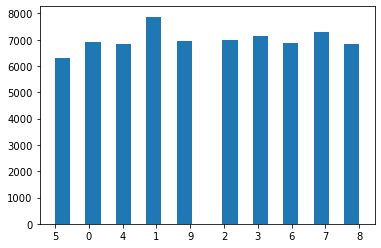

In [14]:
plt.hist(x = mnist["target"], bins = 20)

In [15]:
SGDclass = make_pipeline(StandardScaler(), SGDClassifier(penalty = 'l2', max_iter = 2000, tol = 1e-3, random_state = seed))

X = mnist["data"]
y = mnist["target"]
y = y.astype(np.uint8)
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.5, random_state = seed)

SGDclass.fit(trainX, trainY)
digits = X[0]
SGDclass.predict([digits])

#Cross-validation accuracy
scores = cross_val_score(SGDclass, trainX, trainY, cv = 3, scoring = "accuracy")
print("Scores:", scores.round(2))
print("Mean:", scores.mean().round(2))
print("Standard deviation:", scores.std().round(2))

Scores: [0.9  0.91 0.91]
Mean: 0.91
Standard deviation: 0.0


**Your written answer**: Based on the distribution of 'data', the dataset seems to be very slightly imbalanced in some numbers like 1.  Therefore I'd say its imbalanced but not by a lot at all.

## Extras:

You can run the cell below to see how well your model can recognize a digit written by the mouse cursor. Set the `final_model` variable, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the result.

In [16]:
final_model= SGDclass # use the name of your final model
#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"
app = Tk()
app.geometry("300x300")
canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)
def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=4)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()
img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
# reshaping to support our model input
img = np.reshape(img, 28*28)

#predicting the class
print('\nInput recognized as ' + str(final_model.predict([img])[0])+'.')

FileNotFoundError: [Errno 2] No such file or directory: 'TEMP_image_TEMP.jpg'

## Question 6 [0/0 marks]
It often makes mistakes and its accuracy does not seem to be around 90%. Can you give reasons to explain why?

**Your answer**: 

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.